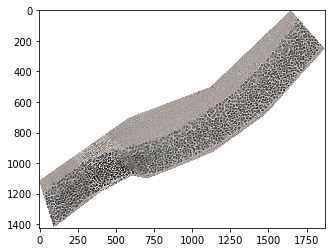

In [64]:
from skimage import data
from skimage.morphology import disk
from skimage.filters import median

img = io.imread("/Users/hannahkim/Desktop/N3.png")
med = median(img)
plt.imshow(med)

0.0
1.0
0.2102490475426494


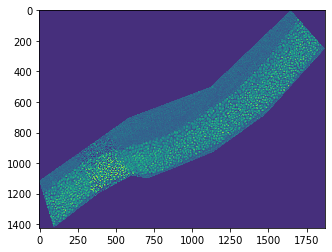

In [65]:
from skimage.color import rgb2hed
from skimage.exposure import rescale_intensity

ihc_hed = rgb2hed(med)
hema = ihc_hed[:, :, 0] 
plt.imshow(hema)

h = rescale_intensity(hema, out_range=(0, 1))
print(np.min(h))
print(np.max(h))
print(np.mean(h))

plt.imshow(h)

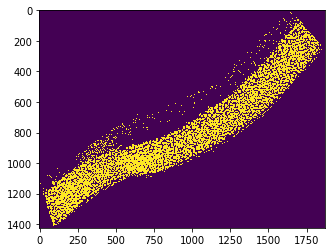

In [66]:
import skimage.filters as skfi

thresh = skfi.threshold_yen(h)
binary = h >= thresh

plt.imshow(binary)

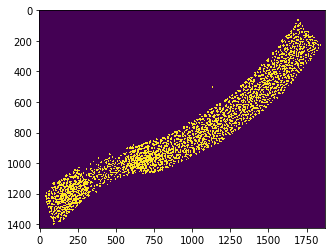

In [67]:
import skimage.morphology as morphology

de1 = morphology.binary_erosion(morphology.binary_erosion(morphology.binary_erosion(morphology.binary_erosion(morphology.binary_erosion(binary)))))
de2 = morphology.binary_dilation(morphology.binary_dilation(morphology.binary_dilation(morphology.binary_dilation(de1))))

plt.imshow(de2)

Found 868 cells in this image


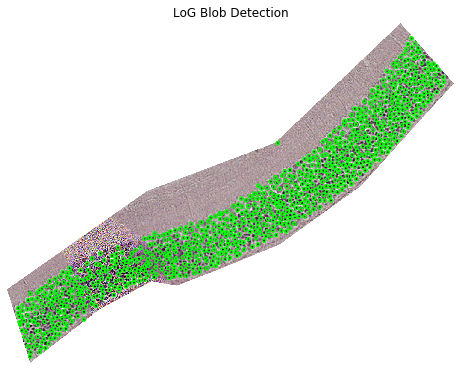

In [70]:
from math import sqrt
from skimage import data
from skimage.feature import blob_log
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

gray = rgb2gray(de2)
blobs_log = feature.blob_log(gray, min_sigma=7, max_sigma=30, num_sigma=1, threshold=.1)
num_cells, num_factors = blobs_log.shape
print("Found {} cells in this image".format(num_cells))

blobs = [blobs_log]
colors = ['lime']
titles = ['LoG Blob Detection']
sequence = zip(blobs, colors, titles)

for blobs, color, title in sequence:
    fig, ax = plt.subplots(1, 1, figsize=(8, 12))
    ax.set_title(title)
    ax.imshow(gray, cmap="gray")
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
        ax.add_patch(c)
    ax.set_axis_off()
    ax.imshow(img, cmap="gray")
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
        ax.add_patch(c)